# Naive Bayes Classifiers

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed in the previous section. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC. 

The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.

In [1]:
import numpy as np
import mglearn

In [4]:
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
           [1,0,1,0]])
y=np.array([0,1,0,1])

counts={}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label]=X[y==label].sum(axis=0)
print("Feature counts: \n {}".format(counts))

Feature counts: 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


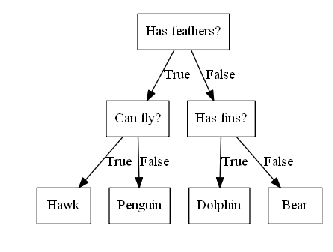

In [5]:
mglearn.plots.plot_animal_tree()

# Analysing Decision tree with Breast cancer dataset 

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not post-pruning. Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As always, we import the dataset and split it into a training and a test part. Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure). We fix the random_state in the tree, which is used for tiebreaking internally:


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:0.2f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.94


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy. 

In [8]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:0.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Now, it's time to visualize 

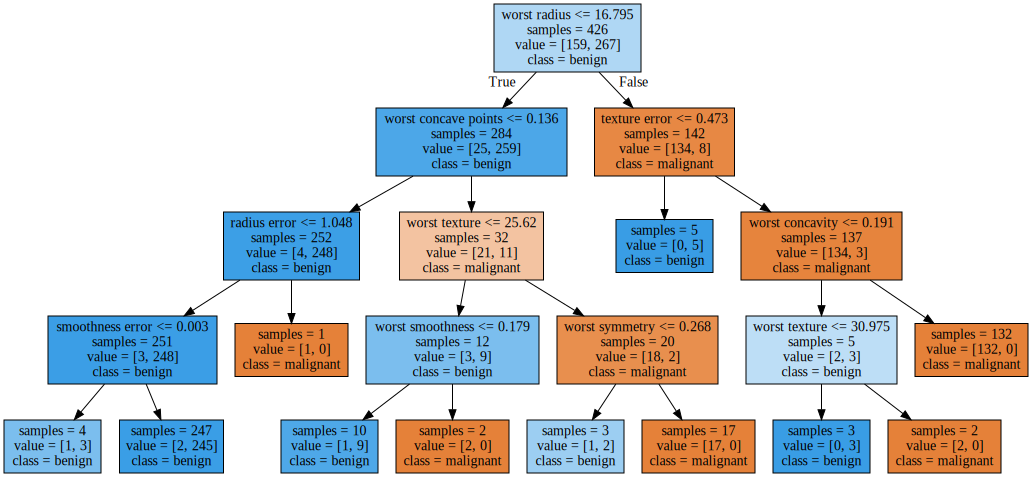

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=['malignant','benign'],
               feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [10]:
print("Feature importance:\n {}".format(tree.feature_importances_))

Feature importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [15]:
from matplotlib import pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] 
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.ylabel("Feature")


In [16]:
plot_feature_importaces_cancer(tree)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_importances'

Feature importances: [0. 1.]


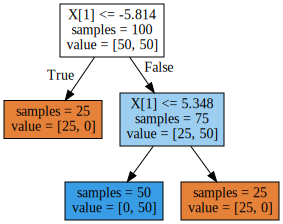

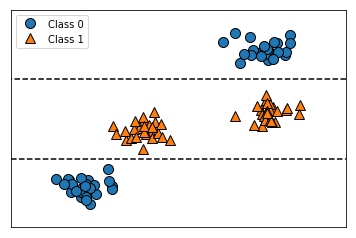

In [17]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)